In [1]:
# -*- coding: utf-8 -*-
# 使用CART进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


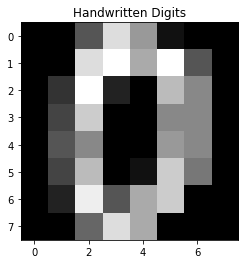

In [2]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [3]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [4]:
# 模型训练预测
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('CART准确率: %0.4lf' % accuracy_score(predict_y, test_y))

CART准确率: 0.8444


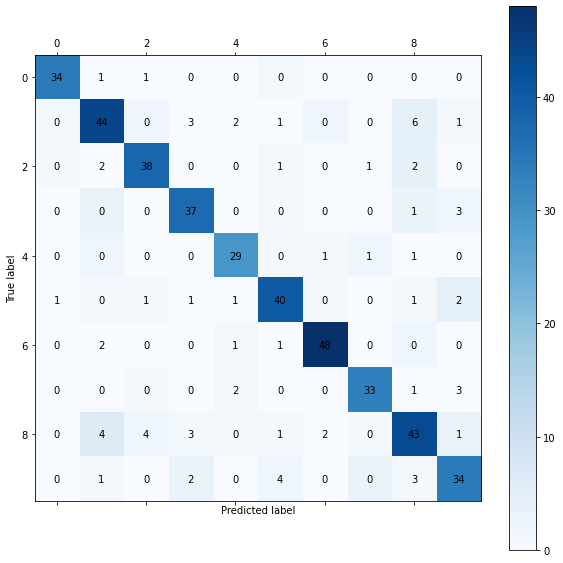

In [5]:
# 画混淆矩阵
def cm_plot(y, yp):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, yp)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.matshow(cm, cmap=plt.cm.Blues, fignum=0)
    plt.colorbar()
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
cm_plot(test_y, predict_y)